## Task 1: Prediction using Supervised ML

**Objective :** 
    Predict the percentage of marks of an student based on the number of
study hours

This is a simple linear regression task as it involves just two variables.

Data can be found at: http://bit.ly/w-data

In [15]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [16]:
# Reading data from remote link
s_data = pd.read_csv("http://bit.ly/w-data")
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
#Check Shape of Data
s_data.shape

(25, 2)

In [18]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
#Check Missing Values
print ("\nMissing values :  ", s_data.isnull().sum().values.sum())


Missing values :   0


**There are no missing values in the dataset**

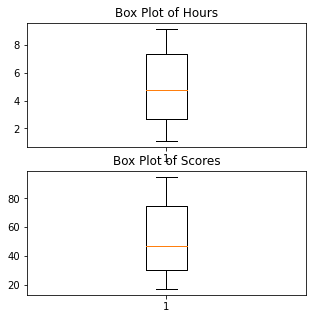

In [20]:
fig = plt.figure(figsize=(5,5))
plt.subplot(211)
plt.boxplot(s_data.iloc[:,0])
plt.title("Box Plot of Hours")
plt.subplot(212)
plt.boxplot(s_data.iloc[:,1])
plt.title("Box Plot of Scores")
plt.show()

**There are no outliers in the Dataset**

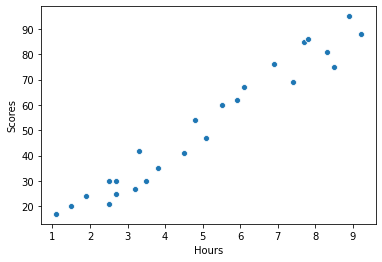

In [21]:
sns.scatterplot(x = s_data.Hours, y = s_data.Scores)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [22]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

 The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [24]:
#Train the linear Model on training Data.
Model = LinearRegression()  
Model.fit(X_train, y_train) 

LinearRegression()

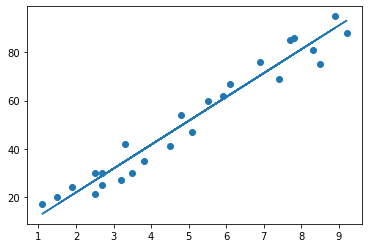

In [25]:
# Plotting the regression line
line = Model.coef_*X+Model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [26]:
y_train_pred = Model.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train, y_train_pred) )
y_test_pred = Model.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test, y_test_pred) )
print()

R2 score of Training Data: 0.9515510725211552
R2 score of Testing Data: 0.9454906892105356



In [27]:
# You can also test with your own data
hours = [[9.25]]
own_pred = Model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
